# CARICHE VARIABILI

Misuriamo l'angolo di torsione dovuto alla repulsione delle sfere cariche poste a una distanza fissa (10cm).
Nel primo file sono raccolte torsioni per sfere di uguale carica, nel secondo viene fissata la carica di una sfera e variata la seconda.
siccome considero sull'asse delle x il prodotto tra le cariche concateno le misure.

In [10]:
import numpy as np
import pandas as pd
import os
from interpolazione3 import b_std

dir_path = os.path.abspath('')
FILE_V1_COST_A2 = dir_path + '/../CSV/' + "d_cost_v1_cost_A2.csv"
FILE_V_EQ_A1 = dir_path + '/../CSV/' + "d_cost_v1_eq_v2_A1.csv"

fr1 = pd.read_csv(FILE_V_EQ_A1)
fr2 = pd.read_csv(FILE_V1_COST_A2)

#V_1 = V_2
V_fissa = np.array(fr1["V"]) *1000 # V  entrambe le sfere hanno la stessa carica
teta1 = np.array(fr1["teta1"]) #deg
teta2 = np.array(fr1["teta2"])
teta3 = np.array(fr1["teta3"])
v_fissa = V_fissa * V_fissa  # considero il prodotto delle cariche
teta_fissa = np.array([np.round(np.average([teta1[i], teta2[i], teta3[i]]), 0) for i in range(0, len(teta1))], dtype=np.float64)
sigma_teta_fissa = np.array([np.sqrt(b_std([teta1[i], teta2[i], teta3[i]])**2+1**2) for i in range(0, len(teta1))], dtype=np.float64)

# fissata V_1, V_2 varia
v_variabile = np.array(fr2["V2"]) * 1000 # V
teta1 = np.array(fr2["teta1"]) #deg
teta2 = np.array(fr2["teta2"])
teta3 = np.array(fr2["teta3"])
v_variabile = v_variabile * 6000  # la seconda carica aveva valore fisso 6kV
teta_variabile = np.array([np.round(np.average([teta1[i], teta2[i], teta3[i]]), 0) for i in range(0, len(teta1))], dtype=np.float64)
sigma_teta_variabile = np.array([np.sqrt(b_std([teta1[i], teta2[i], teta3[i]])**2+1**2) for i in range(0, len(teta1))], dtype=np.float64)

raggio = 0.017
correzione = 1 - ((4 * np.power(raggio, 3)) / 0.1 ** 3)
teta_fissa = teta_fissa / correzione
teta_variabile = teta_variabile / correzione
sigma_teta_fissa = sigma_teta_fissa / correzione
sigma_teta_variabile = sigma_teta_variabile / correzione

VV = np.concatenate([v_variabile, v_fissa]) # prodotto delle cariche x
tetas = np.concatenate([teta_variabile, teta_fissa]) # angoli in rad y
sigma_tetas = np.concatenate([sigma_teta_variabile,sigma_teta_fissa]) #sigma_y

# print(VV/1000000,np.round(tetas,1),np.round(sigma_tetas,1),sep='\n')

#sort per la stampa
# def bubblesort(a,b,c):
#     for i in range(0,len(a)-1):
#         for g in range(i+1,len(a)):
#             if a[i] > a[g]:
#                 a[[g,i]] = a[[i,g]]
#                 b[[g,i]] = b[[i,g]]
#                 c[[g,i]] = c[[i,g]]

# bubblesort(VV,tetas,sigma_tetas)
# print(VV/1000000,np.round(tetas,1),np.round(sigma_tetas,1),sep='\n')

# conversione in radianti
tetas = tetas * np.pi / 180
sigma_tetas = sigma_tetas * np.pi / 180
teta_fissa = teta_fissa * np.pi / 180
teta_variabile = teta_variabile * np.pi / 180
sigma_teta_fissa = sigma_teta_fissa * np.pi / 180
sigma_teta_variabile = sigma_teta_variabile * np.pi / 180

### verifica $\theta \propto V_1V_2$

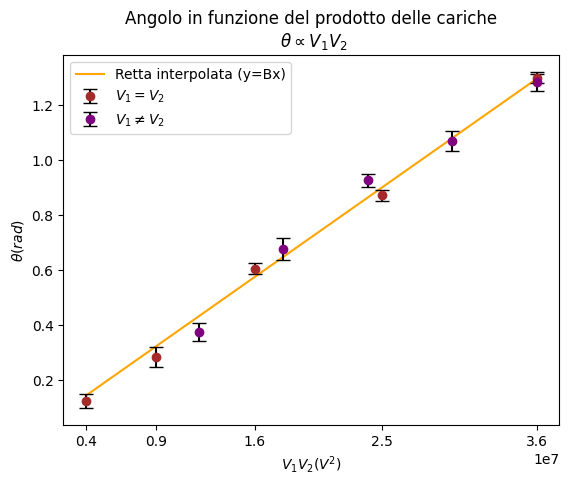


linearità BX
    
B: 3.5984080649468057e-08
sigmaB 5.438966459259451e-10

sigmaY: [0.03250397 0.03980908 0.02517747 0.03560632 0.03250397 0.02517747
 0.03560632 0.02055732 0.02055732 0.02055732]
chiquadro ridotto: 1.75
df: 9
pvalue: 99.5%
sigmaY medio:  0.028805656441620104


In [11]:
from matplotlib import pyplot as plt
from interpolazione3 import RettaInterpolataB

r = RettaInterpolataB(VV,tetas,sigma_tetas)

plt.title("Angolo in funzione del prodotto delle cariche\n $" + chr(92)+"theta \propto V_1V_2$")
plt.plot(r.x_best,r.y_best,color='orange',label='Retta interpolata (y=Bx)')
plt.errorbar(v_fissa,teta_fissa,yerr=sigma_teta_fissa,color='brown',fmt='o',ecolor='black',capsize=5,label='$V_1 = V_2$')
plt.errorbar(v_variabile,teta_variabile,yerr=sigma_teta_variabile,color='purple',fmt='o',ecolor='black',capsize=5,label='$V_1 '+chr(92) +'neq V_2$')
plt.xticks(v_fissa)
plt.xlabel('$V_1V_2 (V^2)$')
plt.ylabel(f'${chr(92)}theta (rad)$')
plt.legend()
plt.show()
print(r)
print("sigmaY medio: ",np.average(r.sigmaY))